# Chapter 2.  Tabular Value-Based Reinforcement Learning

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

## 2.1.  Q-learning
- Implement Q-learning for Taxi, including the procedure to derive the best policy for the Q-table.
- Print the Q-table, to see the values on the squares. You could print a live policy as the search progresses.
- Try different values for $\varepsilon$, the exploration rate. Does it learn faster? Does it keep finding the optimal solution?
- Try different values for $\alpha$, the learning rate. Is it faster?

In [2]:
def taxi_qlearning(gamma: float=0.7, alpha: float=0.2, epsilon: float=0.1, epilogues: int=1000, show_log: bool=True):
    env = gym.make("Taxi-v3")
    env.reset()
    if show_log:
        env.render()

    # Q[state, action] table implementation
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    x = []
    rewards_history = []

    for episode in range(0, epilogues+1):
        done = False
        total_reward = 0
        state = env.reset()
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore state space
            else:
                action = np.argmax(Q[state])  # Exploit learned values
            next_state, reward, done, info = env.step(action)  # invoke Gym
            next_max = np.max(Q[next_state])
            old_value = Q[state, action]

            new_value = old_value + alpha * (reward + gamma * next_max - old_value)

            Q[state, action] = new_value
            total_reward += reward
            state = next_state

        if episode % 100 == 0:
            x.append(episode)
            rewards_history.append(total_reward)            
            if show_log:
                print(f"Episode {episode} Total Reward: {total_reward}")
    
    return Q, x, rewards_history

In [3]:
Q, _, __ = taxi_qlearning()
print("\n", "Q.shape:", Q.shape, "\n")
print(Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -605
Episode 100 Total Reward: -290
Episode 200 Total Reward: -39
Episode 300 Total Reward: -272
Episode 400 Total Reward: -88
Episode 500 Total Reward: -1
Episode 600 Total Reward: -25
Episode 700 Total Reward: 1
Episode 800 Total Reward: 6
Episode 900 Total Reward: -3
Episode 1000 Total Reward: 12

 Q.shape: (500, 6) 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.82428536 -2.80347408 -2.83536169 -2.77700994 -2.39235577 -6.68765248]
 [-1.72517573 -2.015694   -2.32548047 -1.72255116  0.58827548 -6.22870012]
 ...
 [-1.30143687 -1.25726725 -1.30143687 -1.39157418 -2.         -3.628     ]
 [-2.30252692 -2.29522034 -2.3045878  -2.34925919 -3.6790608  -5.06417087]
 [-0.388      -0.41432    -0.388       5.50759679 -3.628      -2.        ]]


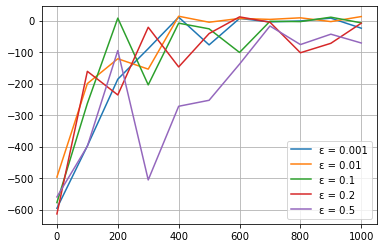

In [4]:
# Try different epsilons
epsilons = [0.001, 0.01, 0.1, 0.2, 0.5]
fig, ax = plt.subplots()

for epsilon in epsilons:
    _, y, x = taxi_qlearning(epsilon=epsilon, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"ε = {epsilon}")

ax.legend()
ax.grid()
plt.show()

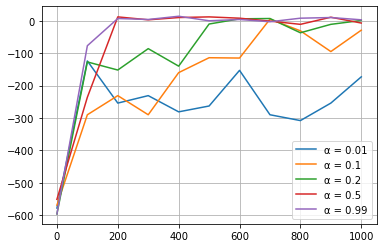

In [5]:
# Try different alpha
alphas = [0.01, 0.1, 0.2, 0.5, 0.99]
fig, ax = plt.subplots()

for alpha in alphas:
    _, y, x = taxi_qlearning(alpha=alpha, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"α = {alpha}")

ax.legend()
ax.grid()
plt.show()

## 2.2.  SARSA
- Implement SARSA.
- Compare your results to Q-learning, can you see how SARSA chooses different paths?
- Try different 𝜖 and 𝛼.

In [6]:
def taxi_sarsa(gamma: float=0.7, alpha: float=0.2, epsilon: float=0.1, epilogues: int=1000, show_log: bool=True, MOD: int=100):
    # Environment Setup
    env = gym.make("Taxi-v3")
    env.reset()
    if show_log:
        env.render()

    # Q[state,action] table implementation
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    x = []
    rewards_history = []

    for episode in range(epilogues):
        done = False
        total_reward = 0
        current_state = env.reset()
        if random.uniform(0, 1) < epsilon:
            current_action = env.action_space.sample()  # Explore state space
        else:
            current_action = np.argmax(Q[current_state])  # Exploit learned values
        while not done:
            next_state, reward, done, info = env.step(current_action)  # invoke Gym
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()  # Explore state space
            else:
                next_action = np.argmax(Q[next_state])  # Exploit learned values
            sarsa_value = Q[next_state,next_action]
            old_value = Q[current_state, current_action]

            new_value = old_value + alpha * (reward + gamma * sarsa_value - old_value)

            Q[current_state,current_action] = new_value
            total_reward += reward
            current_state = next_state
            current_action = next_action

        if episode % MOD == 0:
            x.append(episode)
            rewards_history.append(total_reward)
            if show_log:
                print(f"Episode {episode} Total Reward: {total_reward}")

    return Q, x, rewards_history

In [7]:
Q, _, __ = taxi_sarsa()
print("\n", "Q.shape:", Q.shape, "\n")
print(Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -695
Episode 100 Total Reward: -272
Episode 200 Total Reward: -196
Episode 300 Total Reward: -17
Episode 400 Total Reward: -9
Episode 500 Total Reward: -32
Episode 600 Total Reward: -94
Episode 700 Total Reward: -263
Episode 800 Total Reward: 3
Episode 900 Total Reward: 2

 Q.shape: (500, 6) 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.25007647 -3.61918498 -3.25495863 -3.58159943 -2.9347257  -8.67068734]
 [-2.24498351 -2.11573945 -2.36520787 -2.12818257 -1.48107345 -7.12449623]
 ...
 [-1.6196867  -1.29687698 -1.60623023 -1.61915558 -3.628      -3.6504    ]
 [-3.46693092 -2.95985786 -3.13274536 -3.13829164 -3.628      -7.67038429]
 [-0.4104     -0.388      -0.516       8.80539798 -3.628      -3.628     ]]


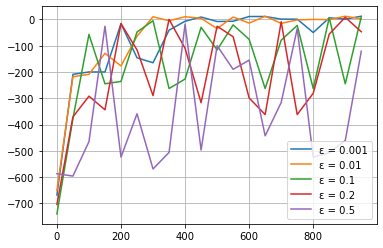

In [8]:
# Try different epsilons
epsilons = [0.001, 0.01, 0.1, 0.2, 0.5]
fig, ax = plt.subplots()

for epsilon in epsilons:
    _, y, x = taxi_sarsa(epsilon=epsilon, epilogues=1000, show_log=False, MOD=50)
    ax.plot(y, x, label=f"ε = {epsilon}")

ax.legend()
ax.grid()
plt.show()

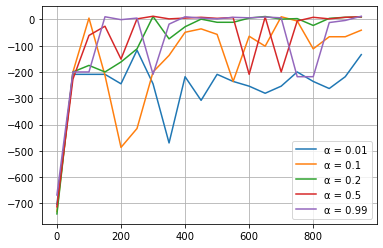

In [9]:
# Try different alpha
alphas = [0.01, 0.1, 0.2, 0.5, 0.99]
fig, ax = plt.subplots()

for alpha in alphas:
    _, y, x = taxi_sarsa(epsilon=0.01, alpha=alpha, epilogues=1000, show_log=False, MOD=50)
    ax.plot(y, x, label=f"α = {alpha}")

ax.legend()
ax.grid()
plt.show()

## 2.3.  Problem Size
- How large can problems be before converging starts taking too long?
- （どれくらいの問題サイズまでなら現実的な時間でQ-learningやSARSAによって収束させられるか？）

**回答**
- Q-learningのアルゴリズム・計算量は大まかにこんな感じ（SARSAもほぼ同様）
    - Qの初期化 $\dots$ $O(|S|\times |A|)$
    - Until 収束:
        - エピソードの初期状態 $s_0$
        - Until エピソードが終わるまで:
            - 行動選択: $a_t = \max_{a'}(Q(s_t, a'))$ またはランダムに選ぶ. $\dots$ $O(|A|)$
            - $Q$の更新: $Q(s_t, a_t) = Q(s_t, a_t) + \alpha (r_{t+1} + \gamma \max_{a'}Q(s_{t+1}, a') - Q(s_t, a_t))$ $\dots$ $O(|A|)$
- 1エピソードの長さは平均的に $O(|S|)$ であると仮定すると、全体の計算量は $O(\text{繰り返し回数} \times |S| \times |A|)$.
- 繰り返し回数は $10^2 \sim 10^3$ のオーダーくらい？
- とすると、$|S|$ や $|A|$ がそれぞれ $10^2 \sim 10^3$ くらいのオーダーなら現実的な計算量て収束させられそうだが、 $10^4 \sim 10^5$ とかになると厳しそうかな？

## 4.  Cartpole
- Run Cartpole with the greedy policy computed by value iteration. Can you make it work?
- Is value iteration a suitable algorithm for Cartpole?
- If not, why do you think it is not?

In [10]:
from cartpole_value_iteration import main
main()

9.0
9.0
9.333333333333334
9.0
9.0
9.0
9.142857142857142
9.25
9.222222222222221
9.4


- Stateを離散化すれば（+ gymのgithub repositoryからstateの更新式を取ってくることで環境既知とすれば）一応value iterationできるといえばできる。
- ただし、4次元の連続値 state space の離散化は $4 \times 4 \times 4 \times 4$ くらいが限界
- 環境既知だったとしても4次元の連続値state spaceの離散化は実用上まともなレベルでは不可能であり、value iterationはおそらく適切でない。